In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import numpy as np
img_array = cv2.imread("/content/gdrive/My Drive/dataset/with mask/3-with-mask.jpg")

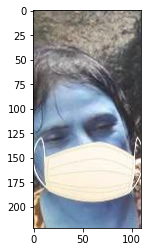

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_array)

In [ ]:
img_array.shape

(340, 510, 3)

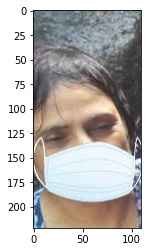

In [ ]:
import os
datadirectory = "/content/gdrive/My Drive/dataset"
classes = ["with mask","without mask"]
for category in classes:
  path = os.path.join(datadirectory,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break


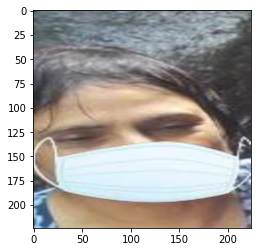

In [ ]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
training_data = []
def create_training_data():
 for category in classes:
   path = os.path.join(datadirectory,category)
   class_num = classes.index(category)
   for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array,(img_size,img_size))
      training_data.append([new_array,class_num])
    except Exception as e:
      pass


In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

1376


In [ ]:
x =[]
y = []
for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1,224,224,3)

In [ ]:
x.shape

(1376, 224, 224, 3)

In [ ]:
x = x/255.0
y = np.array(y)

Deep learning model for training


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()  #pretrained model

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
#transfer learning

base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
new_model.fit(x,y,epochs = 3,validation_split=0.3)

Epoch 1/3
31/31 [==============================] - 201s 6s/step - loss: 0.1867 - accuracy: 0.9229 - val_loss: 0.0611 - val_accuracy: 0.9831
Epoch 2/3
31/31 [==============================] - 195s 6s/step - loss: 0.0201 - accuracy: 0.9972 - val_loss: 0.5730 - val_accuracy: 0.9443
Epoch 3/3
31/31 [==============================] - 194s 6s/step - loss: 0.0140 - accuracy: 0.9941 - val_loss: 0.0435 - val_accuracy: 0.9952


In [ ]:
new_model.save('my_model.h5')

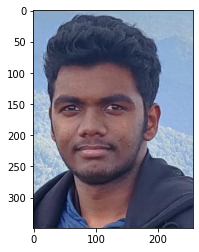

In [77]:
frame = cv2.imread('/content/gdrive/My Drive/dataset/with mask/100-with-mask.jpg')
frame1 = cv2.imread('/content/gdrive/My Drive/test.jpg')
plt.imshow(cv2.cvtColor(frame1,cv2.COLOR_BGR2RGB))

In [80]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

predictions = new_model.predict(final_image)


In [81]:
predictions

array([[1.9259412e-11]], dtype=float32)